In [ ]:
# ----------------------------------
# Importación de librerías
# ----------------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Librerías importadas correctamente.


In [ ]:
# ----------------------------------
# Carga de archivos
# ----------------------------------
try:
    df_clientes = pd.read_excel(r"C:\Users\renzo\OneDrive\Escritorio\BD_Proyecto_Aurelion\Clientes.xlsx")
    df_productos = pd.read_excel(r"C:\Users\renzo\OneDrive\Escritorio\BD_Proyecto_Aurelion\Productos.xlsx")
    df_ventas = pd.read_excel(r"C:\Users\renzo\OneDrive\Escritorio\BD_Proyecto_Aurelion\Ventas.xlsx")
    df_detalle = pd.read_excel(r"C:\Users\renzo\OneDrive\Escritorio\BD_Proyecto_Aurelion\Detalle_ventas.xlsx")
    
    print("Datos cargados exitosamente:")
    print(f"Clientes: {df_clientes.shape}")
    print(f"Productos: {df_productos.shape}")
    print(f"Ventas: {df_ventas.shape}")
    print(f"Detalle Ventas: {df_detalle.shape}")
    
except FileNotFoundError as e:
    print(f"Error: No se encontró el archivo. {e}")

Datos cargados exitosamente:
Clientes: (100, 5)
Productos: (100, 4)
Ventas: (120, 6)
Detalle Ventas: (343, 6)


In [5]:
# ----------------------------------
# Limpieza: Clientes
# ----------------------------------
print("\n--- 2.1. Limpieza de Clientes ---")

df_clientes['fecha_alta'] = pd.to_datetime(df_clientes['fecha_alta'])
df_clientes = df_clientes.drop_duplicates(subset=['id_cliente'], keep='first')
df_clientes['email'] = df_clientes['email'].fillna('desconocido@mail.com')
df_clientes['ciudad'] = df_clientes['ciudad'].fillna('Desconocida')

print("Clientes limpios. Mostrando .info():")
print(df_clientes.info())


--- 2.1. Limpieza de Clientes ---
Clientes limpios. Mostrando .info():
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   id_cliente      100 non-null    int64         
 1   nombre_cliente  100 non-null    object        
 2   email           100 non-null    object        
 3   ciudad          100 non-null    object        
 4   fecha_alta      100 non-null    datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 4.0+ KB
None


In [6]:
# ----------------------------------
# Limpieza: Productos
# ----------------------------------
print("\n--- 2.2. Limpieza de Productos ---")

df_productos['precio_unitario'] = pd.to_numeric(df_productos['precio_unitario'], errors='coerce')
df_productos = df_productos.drop_duplicates(subset=['id_producto'], keep='first')
df_productos = df_productos.dropna(subset=['precio_unitario'])

print("Productos limpios. Mostrando .info():")
print(df_productos.info())


--- 2.2. Limpieza de Productos ---
Productos limpios. Mostrando .info():
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id_producto      100 non-null    int64 
 1   nombre_producto  100 non-null    object
 2   categoria        100 non-null    object
 3   precio_unitario  100 non-null    int64 
dtypes: int64(2), object(2)
memory usage: 3.2+ KB
None


In [7]:
# ----------------------------------
# Limpieza: Ventas
# ----------------------------------
print("\n--- 2.3. Limpieza de Ventas ---")

df_ventas['fecha'] = pd.to_datetime(df_ventas['fecha'])
df_ventas = df_ventas.drop_duplicates(subset=['id_venta'], keep='first')

# Eliminamos columnas redundantes identificadas en el README.md
df_ventas = df_ventas.drop(columns=['nombre_cliente', 'email'])
df_ventas = df_ventas.dropna(subset=['id_cliente', 'fecha'])
df_ventas['id_cliente'] = df_ventas['id_cliente'].astype(int)

print("Ventas limpias y normalizadas. Mostrando .info():")
print(df_ventas.info())


--- 2.3. Limpieza de Ventas ---
Ventas limpias y normalizadas. Mostrando .info():
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   id_venta    120 non-null    int64         
 1   fecha       120 non-null    datetime64[ns]
 2   id_cliente  120 non-null    int64         
 3   medio_pago  120 non-null    object        
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 3.9+ KB
None


In [8]:
# ----------------------------------
# Limpieza: Detalle_ventas
# ----------------------------------
print("\n--- 2.4. Limpieza de Detalle_ventas ---")

# Eliminamos columna redundante
df_detalle = df_detalle.drop(columns=['nombre_producto'])
df_detalle['cantidad'] = pd.to_numeric(df_detalle['cantidad'], errors='coerce')
df_detalle['precio_unitario'] = pd.to_numeric(df_detalle['precio_unitario'], errors='coerce')
df_detalle['importe'] = pd.to_numeric(df_detalle['importe'], errors='coerce')

# Una venta sin importe o cantidad no sirve
df_detalle = df_detalle.dropna(subset=['id_venta', 'id_producto', 'importe', 'cantidad'])

print("Detalle de Ventas limpio. Mostrando .info():")
print(df_detalle.info())


--- 2.4. Limpieza de Detalle_ventas ---
Detalle de Ventas limpio. Mostrando .info():
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 343 entries, 0 to 342
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   id_venta         343 non-null    int64
 1   id_producto      343 non-null    int64
 2   cantidad         343 non-null    int64
 3   precio_unitario  343 non-null    int64
 4   importe          343 non-null    int64
dtypes: int64(5)
memory usage: 13.5 KB
None


In [9]:
# ----------------------------------
# Integridad Referencial
# ----------------------------------
print("\n--- 3. Verificación de Integridad Referencial ---")

# 1. Ventas -> Clientes
clientes_validos = df_clientes['id_cliente'].unique()
ventas_invalidas = df_ventas[~df_ventas['id_cliente'].isin(clientes_validos)].shape[0]
print(f"Ventas con id_cliente 'huérfano': {ventas_invalidas}")
if ventas_invalidas > 0:
    df_ventas = df_ventas[df_ventas['id_cliente'].isin(clientes_validos)]

# 2. Detalle_ventas -> Ventas
ventas_validas = df_ventas['id_venta'].unique()
detalles_invalidos = df_detalle[~df_detalle['id_venta'].isin(ventas_validas)].shape[0]
print(f"Detalles con id_venta 'huérfano': {detalles_invalidos}")
if detalles_invalidos > 0:
    df_detalle = df_detalle[df_detalle['id_venta'].isin(ventas_validas)]
    
print("Verificación de integridad completada. Datos huérfanos eliminados.")


--- 3. Verificación de Integridad Referencial ---
Ventas con id_cliente 'huérfano': 0
Detalles con id_venta 'huérfano': 0
Verificación de integridad completada. Datos huérfanos eliminados.


In [10]:
# ----------------------------------
# Preparación de Base RFM
# ----------------------------------
print("\n--- 4. Preparando la base para RFM ---")

# 1. Calcular el valor monetario (M) por cada VENTA
df_ventas_monetario = df_detalle.groupby('id_venta')['importe'].sum().reset_index()
df_ventas_monetario = df_ventas_monetario.rename(columns={'importe': 'total_venta'})

# 2. Unir la tabla de Ventas (R y F) con la tabla de Monetario (M)
df_rfm_base = pd.merge(
    df_ventas,
    df_ventas_monetario,
    on='id_venta',
    how='inner' # Solo nos quedamos con ventas que tuvieron detalle
)

# 3. Seleccionar las columnas finales necesarias
df_rfm_base = df_rfm_base[['id_cliente', 'fecha', 'id_venta', 'total_venta']]

print("\nBase consolidada para RFM creada. Mostrando 5 filas:")
print(df_rfm_base.head())

# 4. Guardar la base limpia
# df_rfm_base.to_csv(r'C:\Users\renzo\Downloads\rfm_base_limpia.csv', index=False)

print("\n¡PROCESO COMPLETADO!")
print("Se ha guardado el archivo 'rfm_base_limpia.csv' en tu carpeta.")


--- 4. Preparando la base para RFM ---

Base consolidada para RFM creada. Mostrando 5 filas:
   id_cliente      fecha  id_venta  total_venta
0          62 2024-06-19         1         2902
1          49 2024-03-17         2        34186
2          20 2024-01-13         3        19558
3          36 2024-02-27         4        15966
4          56 2024-06-11         5        16360

¡PROCESO COMPLETADO!
Se ha guardado el archivo 'rfm_base_limpia.csv' en tu carpeta.


### Analisis

In [12]:
# ----------------------------------
# Cálculo de R, F y M por Cliente
# ----------------------------------

# 1. Cargar la base de transacciones que limpiamos
try:
    df_base = pd.read_csv(r"C:\Users\renzo\Downloads\rfm_base_limpia.csv")
    df_base['fecha'] = pd.to_datetime(df_base['fecha'])
    print("Archivo 'rfm_base_limpia.csv' cargado.")
except FileNotFoundError:
    print("Error: No se encontró 'rfm_base_limpia.csv'.")
    print("Asegúrate de ejecutar las celdas anteriores primero.")

# 2. Definir la fecha de "hoy" (snapshot)
# Usamos un día después de la última venta para que sea reproducible
snapshot_date = df_base['fecha'].max() + pd.Timedelta(days=1)
print(f"Fecha del snapshot (para calcular Recencia): {snapshot_date.date()}")

# 3. Calcular R, F y M
df_rfm = df_base.groupby('id_cliente').agg(
    Recencia=('fecha', lambda x: (snapshot_date - x.max()).days),
    Frecuencia=('id_venta', 'count'),
    Monetario=('total_venta', 'sum')
).reset_index()

print("\nTabla RFM por cliente generada (primeras 5 filas):")
print(df_rfm.head())

# Asegurarse de que los tipos de datos son correctos
df_rfm['Recencia'] = df_rfm['Recencia'].astype(int)
df_rfm['Frecuencia'] = df_rfm['Frecuencia'].astype(int)
df_rfm['Monetario'] = df_rfm['Monetario'].astype(float)

Archivo 'rfm_base_limpia.csv' cargado.
Fecha del snapshot (para calcular Recencia): 2024-06-29

Tabla RFM por cliente generada (primeras 5 filas):
   id_cliente  Recencia  Frecuencia  Monetario
0           1        95           2      72448
1           2        78           1      22150
2           3       134           1      33310
3           5         4           4     132158
4           6       137           2      48878


In [13]:
# ----------------------------------
# 1. Estadísticas Básicas
# ----------------------------------
print("--- Estadísticas Descriptivas de RFM ---")
# .describe() nos da la media, mediana (50%), min, max, y cuartiles
print(df_rfm[['Recencia', 'Frecuencia', 'Monetario']].describe())

--- Estadísticas Descriptivas de RFM ---
         Recencia  Frecuencia      Monetario
count   67.000000   67.000000      67.000000
mean    75.940299    1.791045   39573.388060
std     52.826727    0.946081   23945.209866
min      1.000000    1.000000    4283.000000
25%     26.000000    1.000000   21554.500000
50%     72.000000    2.000000   34326.000000
75%    120.500000    2.000000   55557.500000
max    172.000000    5.000000  132158.000000



--- Visualización de Distribuciones ---


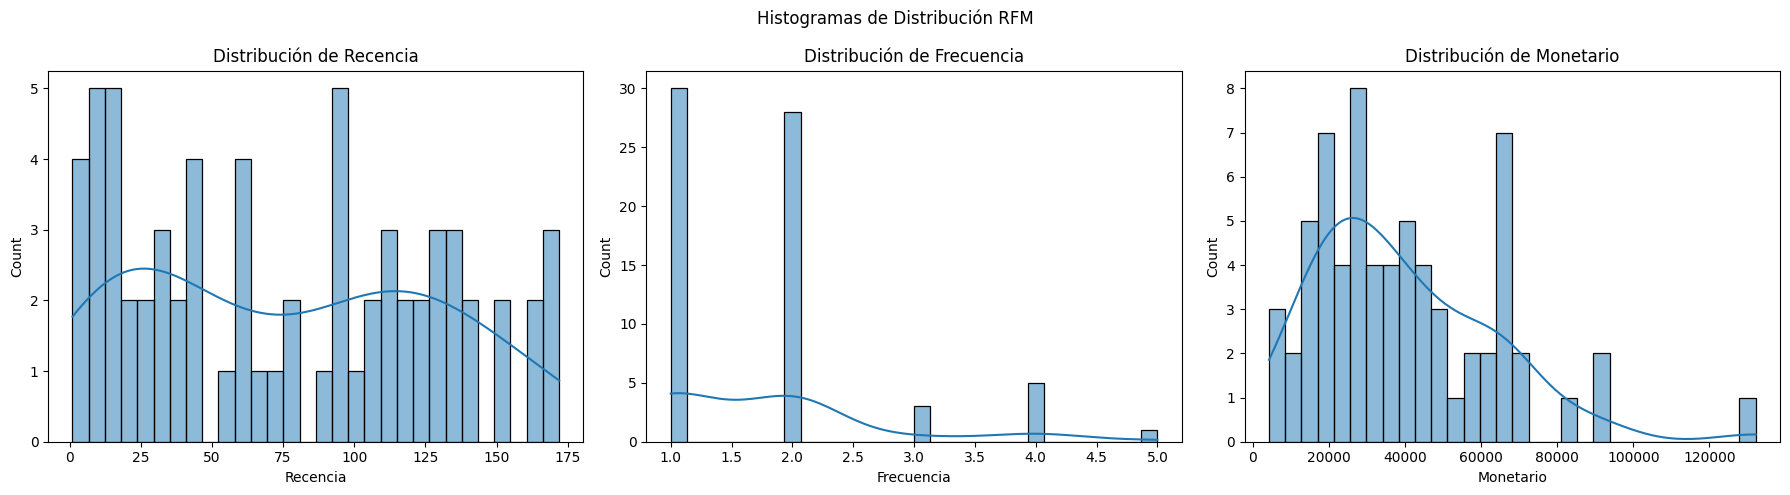

In [14]:
# ----------------------------------
# 2. Tipo de Distribución
# ----------------------------------
print("\n--- Visualización de Distribuciones ---")

# Crear una figura con 3 sub-gráficos (uno para R, uno para F, uno para M)
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
fig.suptitle('Histogramas de Distribución RFM')

# Gráfico de Recencia
sns.histplot(df_rfm['Recencia'], bins=30, ax=axes[0], kde=True)
axes[0].set_title('Distribución de Recencia')

# Gráfico de Frecuencia
sns.histplot(df_rfm['Frecuencia'], bins=30, ax=axes[1], kde=True)
axes[1].set_title('Distribución de Frecuencia')

# Gráfico de Monetario
sns.histplot(df_rfm['Monetario'], bins=30, ax=axes[2], kde=True)
axes[2].set_title('Distribución de Monetario')

plt.tight_layout()
plt.show()


--- Matriz de Correlación RFM ---
            Recencia  Frecuencia  Monetario
Recencia    1.000000   -0.408915  -0.334218
Frecuencia -0.408915    1.000000   0.651873
Monetario  -0.334218    0.651873   1.000000


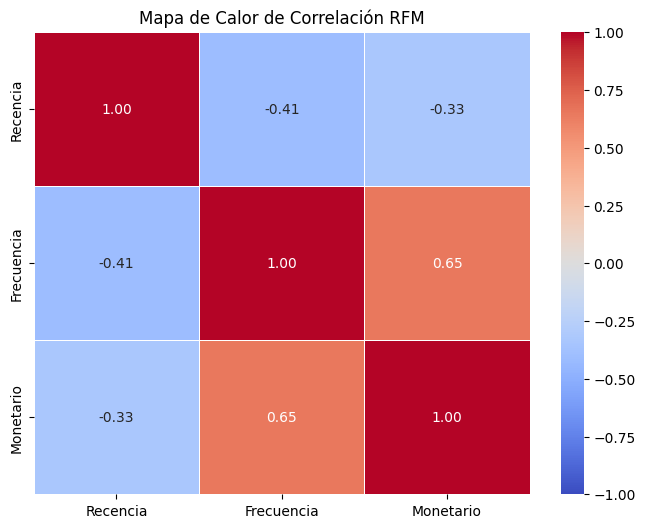

In [15]:
# ----------------------------------
# 3. Correlaciones
# ----------------------------------
print("\n--- Matriz de Correlación RFM ---")

# Calcular la matriz de correlación
corr_matrix = df_rfm[['Recencia', 'Frecuencia', 'Monetario']].corr()

print(corr_matrix)

# Visualizar la matriz con un mapa de calor (heatmap)
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f",
            linewidths=0.5, vmin=-1, vmax=1)

plt.title('Mapa de Calor de Correlación RFM')
plt.show()


--- Visualización de Outliers (Boxplots) ---


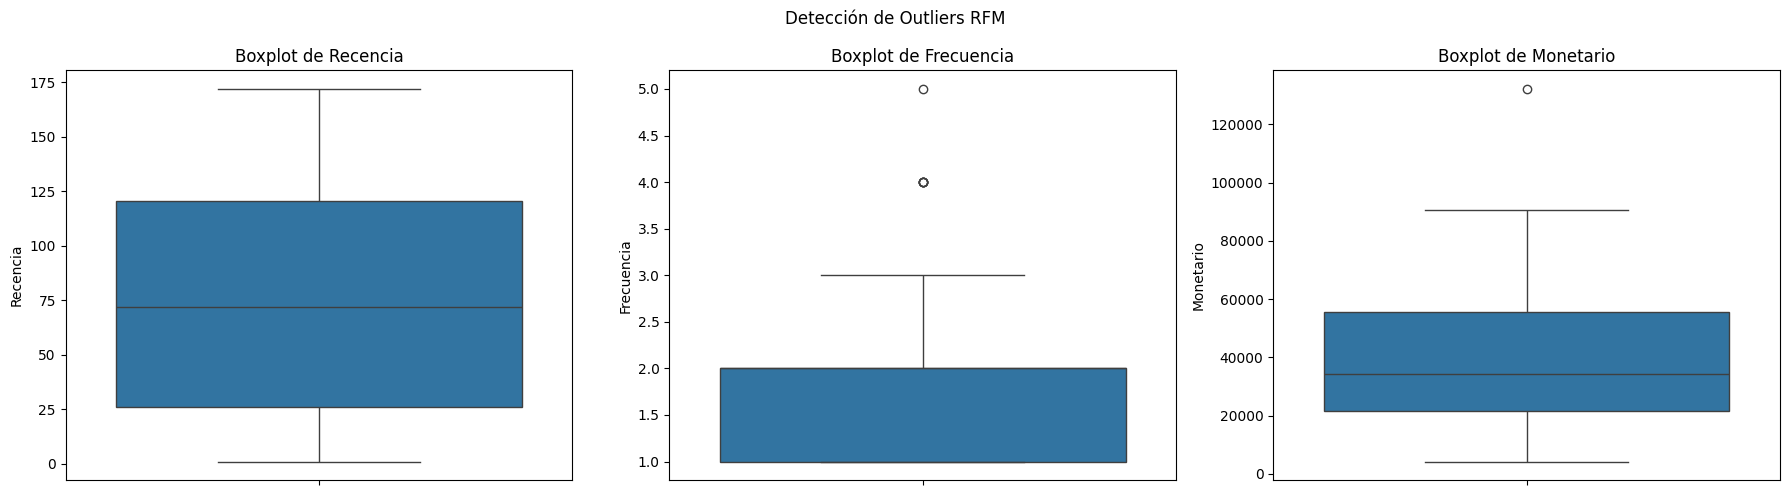

In [17]:
# ----------------------------------
# 4. Análisis de Outliers
# ----------------------------------
print("\n--- Visualización de Outliers (Boxplots) ---")

# Crear una figura con 3 sub-gráficos
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
fig.suptitle('Detección de Outliers RFM')

# Boxplot de Recencia
sns.boxplot(y=df_rfm['Recencia'], ax=axes[0])
axes[0].set_title('Boxplot de Recencia')

# Boxplot de Frecuencia
sns.boxplot(y=df_rfm['Frecuencia'], ax=axes[1])
axes[1].set_title('Boxplot de Frecuencia')

# Boxplot de Monetario
sns.boxplot(y=df_rfm['Monetario'], ax=axes[2])
axes[2].set_title('Boxplot de Monetario')

plt.tight_layout()
plt.show()

### Interpretacion de Resultados

In [18]:
# ----------------------------------
# 1. Enriquecer df_rfm con 'ciudad'
# ----------------------------------

# Asumimos que df_rfm (Celda 10) y df_clientes (Celda 3)
# ya están en memoria y limpios.
print(f"Clientes en df_rfm: {df_rfm.shape[0]}")
print(f"Clientes en df_clientes: {df_clientes.shape[0]}")

# Hacemos un merge para agregar la 'ciudad' a la tabla RFM
# Usamos 'id_cliente' como llave
df_rfm_enriquecido = pd.merge(
    df_rfm,
    df_clientes[['id_cliente', 'ciudad']], # Solo traemos las columnas que necesitamos
    on='id_cliente',
    how='left' # Queremos mantener a todos los clientes de df_rfm
)

print("\nTabla RFM enriquecida con 'ciudad' (primeras 5 filas):")
print(df_rfm_enriquecido.head())

Clientes en df_rfm: 67
Clientes en df_clientes: 100

Tabla RFM enriquecida con 'ciudad' (primeras 5 filas):
   id_cliente  Recencia  Frecuencia  Monetario       ciudad
0           1        95           2    72448.0   Carlos Paz
1           2        78           1    22150.0   Carlos Paz
2           3       134           1    33310.0   Rio Cuarto
3           5         4           4   132158.0      Cordoba
4           6       137           2    48878.0  Villa Maria


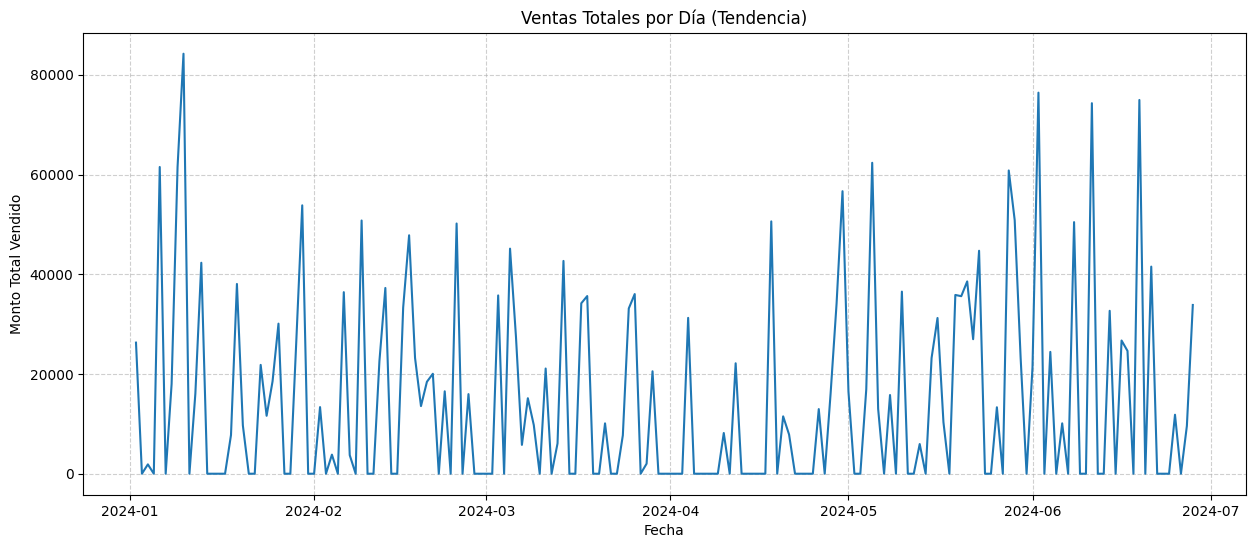

Patrón de Tendencia:
El gráfico de líneas nos muestra la estacionalidad del minimarket.
Podemos identificar picos de ventas (quizás fines de semana o fin de mes) o si las ventas están creciendo o decreciendo.


In [20]:
# ----------------------------------
# 2.1 Visualización: Ventas a lo largo del Tiempo
# ----------------------------------
# Usamos df_base (nuestra tabla de transacciones limpias de Celda 10)
# Necesitamos agregar las ventas por día

df_ventas_diarias = df_base.set_index('fecha').resample('D')['total_venta'].sum().reset_index()

plt.figure(figsize=(15, 6))
sns.lineplot(data=df_ventas_diarias, x='fecha', y='total_venta')

plt.title('Ventas Totales por Día (Tendencia)')
plt.xlabel('Fecha')
plt.ylabel('Monto Total Vendido')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

# ----------------------------------
# 3.1 Identificación de Patrón (Tendencia)
# ----------------------------------
print("Patrón de Tendencia:")
print("El gráfico de líneas nos muestra la estacionalidad del minimarket.")
print("Podemos identificar picos de ventas (quizás fines de semana o fin de mes) o si las ventas están creciendo o decreciendo.")

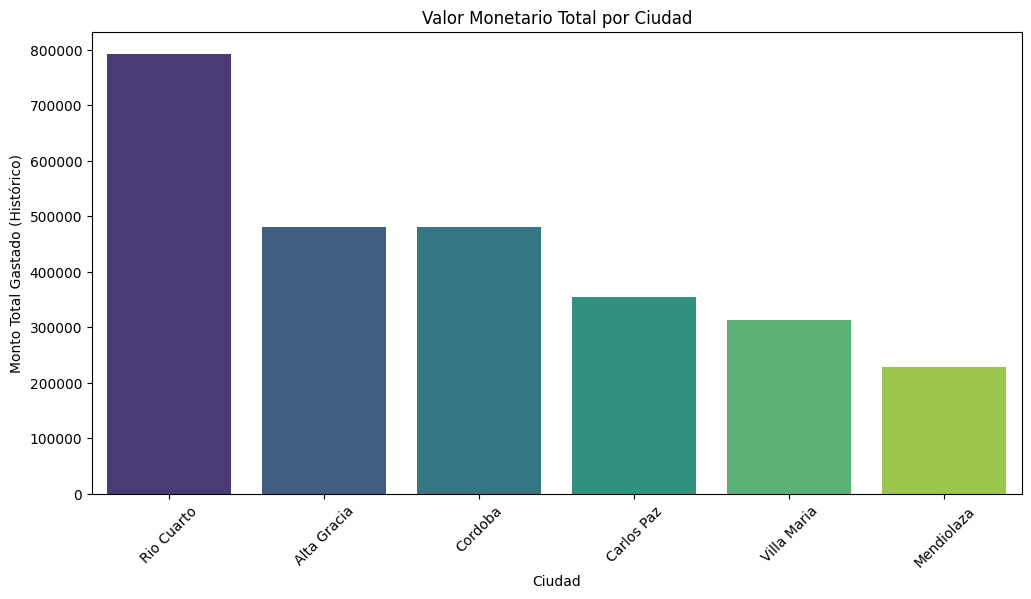

Patrón de Valor:
Este gráfico de barras identifica las ciudades que generan más ingresos.
Es probable que una ciudad, aunque tenga menos clientes, genere más ingresos totales (clientes de mayor valor).


In [21]:
# ----------------------------------
# 2.2 Visualización: Gasto Total por Ciudad
# ----------------------------------
# Usamos df_rfm_enriquecido (Celda 16)

# Agrupamos por ciudad y sumamos el valor Monetario
df_gasto_ciudad = df_rfm_enriquecido.groupby('ciudad')['Monetario'].sum().sort_values(ascending=False).reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(data=df_gasto_ciudad, x='ciudad', y='Monetario', palette='viridis')

plt.title('Valor Monetario Total por Ciudad')
plt.xlabel('Ciudad')
plt.ylabel('Monto Total Gastado (Histórico)')
plt.xticks(rotation=45)
plt.show()

# ----------------------------------
# 3.2 Identificación de Patrón (Valor)
# ----------------------------------
print("Patrón de Valor:")
print("Este gráfico de barras identifica las ciudades que generan más ingresos.")
print("Es probable que una ciudad, aunque tenga menos clientes, genere más ingresos totales (clientes de mayor valor).")

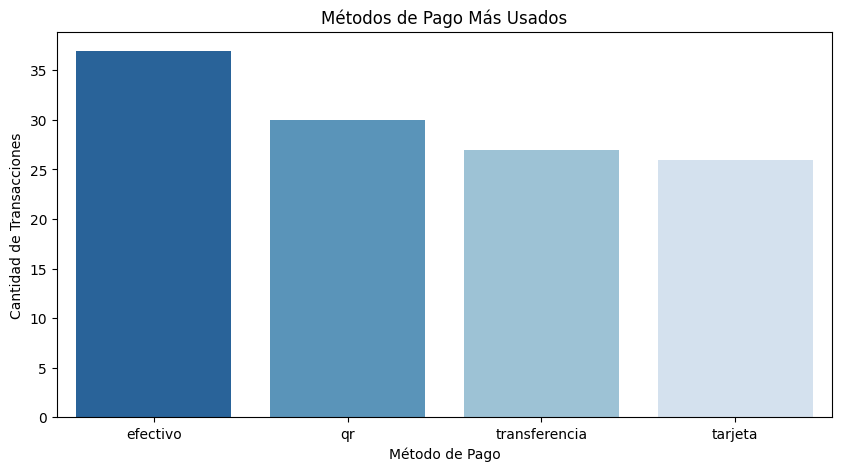

Patrón de Hábito:
El gráfico de conteo muestra la preferencia de pago de los clientes.
Podemos ver que 'efectivo' predomina por encima de los demas metodos de pago.


In [23]:
# ----------------------------------
# 2.3 Visualización: Frecuencia de Métodos de Pago
# ----------------------------------
# Asumimos que df_ventas (Celda 5) está en memoria y limpio
# Si no, tendríamos que volver a cargarlo.
# (df_ventas contiene 'id_venta' y 'medio_pago')

plt.figure(figsize=(10, 5))
sns.countplot(data=df_ventas, x='medio_pago', order=df_ventas['medio_pago'].value_counts().index, palette='Blues_r')

plt.title('Métodos de Pago Más Usados')
plt.xlabel('Método de Pago')
plt.ylabel('Cantidad de Transacciones')
plt.show()

# ----------------------------------
# 3.3 Identificación de Patrón (Hábito)
# ----------------------------------
print("Patrón de Hábito:")
print("El gráfico de conteo muestra la preferencia de pago de los clientes.")
print("Podemos ver que 'efectivo' predomina por encima de los demas metodos de pago.")